In [1]:
import math, os, sys
#import pickle
from glob import glob
import numpy as np
from numpy.random import random, permutation, randn, normal
#from matplotlib import pyplot as plt
%matplotlib inline
import PIL
from PIL import Image
#import bcolz
from shutil import copyfile
from shutil import move

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input,  GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.preprocessing import image
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.metrics import categorical_crossentropy
from keras.regularizers import l2,l1

Using TensorFlow backend.


In [2]:
current_dir_train = "/home/barath/Downloads/train/"
#path = current_dir
#results_path = path + '/results/'
#train_path = path + '/train/'
#valid_path = path + '/valid'

main_directory = '/media/barath/DE3669CE3669A7EB/shruthi_636/'
smaller_train = '/media/barath/DE3669CE3669A7EB/shruthi_636/train/'
validation = '/media/barath/DE3669CE3669A7EB/shruthi_636/validation/'
class_labels = ['c0','c1','c2','c3','c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [8]:
import shutil

In [10]:
for label in class_labels:
    g = glob(current_dir_train+label+'/*.jpg')
    shuffle = np.random.permutation(g)
    #print(shuffle[0])
    for i in range(400): 
        shutil.copy(shuffle[i], validation+label)
    for i in range(400,len(shuffle)): 
        shutil.copy(shuffle[i], smaller_train+label) 

In [14]:
def get_batches(path, gen=image.ImageDataGenerator(), shuffle=True, 
                batch_size=1, target_size=(224,224), class_mode='categorical'):
    return gen.flow_from_directory(path, target_size, 
                class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

def get_data(path, target_size = (150,150)):
    batches = get_batches(path, shuffle=False, batch_size=1, class_mode=None, target_size=target_size)
    return np.concatenate([batches.next() for i in range (len(batches.classes))])

In [15]:
# Roll into pixcel matrix
train_data = get_data(smaller_train)
valid_data = get_data(validation)

Found 18424 images belonging to 10 classes.
Found 4995 images belonging to 10 classes.


In [16]:
save_array('/media/barath/DE3669CE3669A7EB/shruthi_636/results/train_data.dat', train_data)
save_array('/media/barath/DE3669CE3669A7EB/shruthi_636/results/validation_data.dat', valid_data)

NameError: name 'save_array' is not defined

In [18]:
def get_classes(path):
    batches = get_batches(path+'train', shuffle=False, batch_size=1)
    val_batches = get_batches(path+'validation', shuffle=False, batch_size=1)
    #test_batches = get_batches('test', shuffle=False, batch_size=1)
    return (val_batches.classes, batches.classes,to_categorical(val_batches.classes),
            to_categorical(batches.classes),val_batches.filenames, batches.filenames)

In [19]:
(valid_classes, train_classes, valid_labels, train_labels, valid_filenames, train_filenames) = get_classes(main_directory)

Found 18424 images belonging to 10 classes.
Found 4995 images belonging to 10 classes.


In [28]:
from keras.layers.convolutional import Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.core import Flatten, Dense, Dropout


vgg_model = Sequential()
vgg_model.add(ZeroPadding2D((1,1),input_shape=(150,150,3)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(MaxPooling2D((2,2), strides=(2,2)))

vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(MaxPooling2D((2,2), strides=(2,2)))

vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(MaxPooling2D((2,2), strides=(2,2)))

vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(MaxPooling2D((2,2), strides=(2,2)))
vgg_model.add(Dropout(0.2))

vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(MaxPooling2D((2,2), strides=(2,2)))
vgg_model.add(Dropout(0.3))

vgg_model.add(Flatten())
vgg_model.add(Dense(4096))
vgg_model.add(Activation('relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(4096))
vgg_model.add(Activation('relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(10, activation='softmax'))
vgg_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_5 (ZeroPaddin (None, 152, 152, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
activation_7 (Activation)    (None, 150, 150, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 148, 148, 64)      36928     
_________________________________________________________________
activation_8 (Activation)    (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
zero_padding2d_6 (ZeroPaddin (None, 76, 76, 64)        0         
__________

In [30]:
from keras.optimizers import RMSprop

vgg_model.compile(RMSprop(lr=10e-6), loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
import time
from keras.callbacks import ModelCheckpoint,TensorBoard, EarlyStopping

# checkpoint
filepath="/media/barath/DE3669CE3669A7EB/shruthi_636/training_result_copycode/full_model_{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
callbacks_list.append(earlystopping)
#tensorboard visulaization
tensorboard = TensorBoard(log_dir='/media/barath/DE3669CE3669A7EB/shruthi_636/logs_copycode/{}'.format(time.time()))
callbacks_list.append(tensorboard)

In [34]:
from matplotlib import pyplot as plt

def plot_history(Exp_history):
    plt.figure(1)
    plt.subplot(211)
    plt.plot(Exp_history.history['acc'])
    plt.plot(Exp_history.history['val_acc'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.subplot(212)
    plt.plot(Exp_history.history['loss'])
    plt.plot(Exp_history.history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epoches')
    plt.legend(['train', 'validation'], loc='upper left')
    #plt.savefig(results_path+'/train_history/Exp_train_history_1.png', bbox_inches='tight')
    plt.show()

In [45]:
train_data.shape

(18424, 150, 150, 3)

In [35]:
batch_size=32


history = vgg_model.fit(train_data, train_labels, batch_size = batch_size, epochs = 50, validation_data =(valid_data,valid_labels), verbose = 1, callbacks=callbacks_list)

Train on 18424 samples, validate on 4995 samples
Epoch 1/50
18424/18424 [==============================] - 62s 3ms/step - loss: 2.3118 - acc: 0.1115 - val_loss: 2.2749 - val_acc: 0.0827

Epoch 00001: val_acc improved from -inf to 0.08268, saving model to /media/barath/DE3669CE3669A7EB/shruthi_636/training_result_copycode/full_model_01-0.08.hdf5
Epoch 2/50
18424/18424 [==============================] - 60s 3ms/step - loss: 2.1450 - acc: 0.2102 - val_loss: 1.7224 - val_acc: 0.4501

Epoch 00002: val_acc improved from 0.08268 to 0.45005, saving model to /media/barath/DE3669CE3669A7EB/shruthi_636/training_result_copycode/full_model_02-0.45.hdf5
Epoch 3/50
18424/18424 [==============================] - 60s 3ms/step - loss: 1.6990 - acc: 0.3757 - val_loss: 1.3159 - val_acc: 0.5518

Epoch 00003: val_acc improved from 0.45005 to 0.55175, saving model to /media/barath/DE3669CE3669A7EB/shruthi_636/training_result_copycode/full_model_03-0.55.hdf5
Epoch 4/50
18424/18424 [===========================

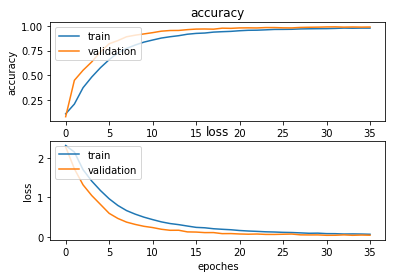

In [36]:
plot_history(history)

In [37]:
train_data.shape

(18424, 150, 150, 3)

In [38]:
train_labels.shape

(18424, 10)

In [3]:
import keras
keras.backend.image_data_format()

'channels_last'